<a href="https://colab.research.google.com/github/ayyucedemirbas/KEGG_Pathway_Enrichment_Analysis/blob/main/KEGG_pathway_enrichment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("clusterProfiler")
BiocManager::install("enrichplot")
BiocManager::install("org.Hs.eg.db")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘fontBitstreamVera’, ‘fontLiberation’, ‘formatR’, ‘fontquiver’, ‘XVector’, ‘Seqinfo’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘gdtools’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘ggiraph’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘KEGGREST’, ‘BiocParallel’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggfun’, ‘ggnewscale’, ‘ggrepel’, ‘ggtangle’, ‘tidydr’, ‘scatterpie’, ‘ggtree’, ‘R

In [2]:
library(clusterProfiler)
library(enrichplot)
library(ggplot2)
library(org.Hs.eg.db)



clusterProfiler v4.18.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

G Yu. Thirteen years of clusterProfiler. The Innovation. 2024,
5(6):100722


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


enrichplot v1.30.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘pack

In [3]:
set.seed(123)

In [4]:
gene_symbols <- c("TP53", "BRCA1", "EGFR", "KRAS", "MYC",
                  "PTEN", "AKT1", "PIK3CA", "NRAS", "BRAF",
                  "CDK4", "CDKN2A", "RB1", "ATM", "MDM2",
                  "VEGFA", "HIF1A", "MTOR", "TSC1", "TSC2")

In [5]:
gene_entrez <- bitr(gene_symbols,
                    fromType = "SYMBOL",
                    toType = "ENTREZID",
                    OrgDb = org.Hs.eg.db)

'select()' returned 1:1 mapping between keys and columns



In [6]:
print(gene_entrez)

   SYMBOL ENTREZID
1    TP53     7157
2   BRCA1      672
3    EGFR     1956
4    KRAS     3845
5     MYC     4609
6    PTEN     5728
7    AKT1      207
8  PIK3CA     5290
9    NRAS     4893
10   BRAF      673
11   CDK4     1019
12 CDKN2A     1029
13    RB1     5925
14    ATM      472
15   MDM2     4193
16  VEGFA     7422
17  HIF1A     3091
18   MTOR     2475
19   TSC1     7248
20   TSC2     7249


In [7]:
kegg_enrich <- enrichKEGG(gene = gene_entrez$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 0.05,
                          qvalueCutoff = 0.2)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

kegg_category.rda is not found, download it online...



In [8]:
print(head(kegg_enrich))

                   category                     subcategory       ID
hsa04218 Cellular Processes           Cell growth and death hsa04218
hsa05214     Human Diseases          Cancer: specific types hsa05214
hsa05219     Human Diseases          Cancer: specific types hsa05219
hsa05218     Human Diseases          Cancer: specific types hsa05218
hsa05163     Human Diseases       Infectious disease: viral hsa05163
hsa01522     Human Diseases Drug resistance: antineoplastic hsa01522
                             Description GeneRatio  BgRatio RichFactor
hsa04218             Cellular senescence     15/20 157/9521  0.0955414
hsa05214                          Glioma     13/20  76/9521  0.1710526
hsa05219                  Bladder cancer     11/20  41/9521  0.2682927
hsa05218                        Melanoma     12/20  73/9521  0.1643836
hsa05163 Human cytomegalovirus infection     15/20 227/9521  0.0660793
hsa01522            Endocrine resistance     12/20  99/9521  0.1212121
         FoldEnrichm

In [9]:
kegg_results <- as.data.frame(kegg_enrich)
print(kegg_results)

                                     category
hsa04218                   Cellular Processes
hsa05214                       Human Diseases
hsa05219                       Human Diseases
hsa05218                       Human Diseases
hsa05163                       Human Diseases
hsa01522                       Human Diseases
hsa05224                       Human Diseases
hsa05212                       Human Diseases
hsa05220                       Human Diseases
hsa05225                       Human Diseases
hsa05165                       Human Diseases
hsa04151 Environmental Information Processing
hsa05215                       Human Diseases
hsa05230                       Human Diseases
hsa05223                       Human Diseases
hsa05205                       Human Diseases
hsa05213                       Human Diseases
hsa05206                       Human Diseases
hsa04919                   Organismal Systems
hsa01521                       Human Diseases
hsa05167                       Hum

Warning message in (function (model, data, ...) :
“Arguments in `...` must be used.
✖ Problematic argument:
• by = "Count"
ℹ Did you misspell an argument name?”


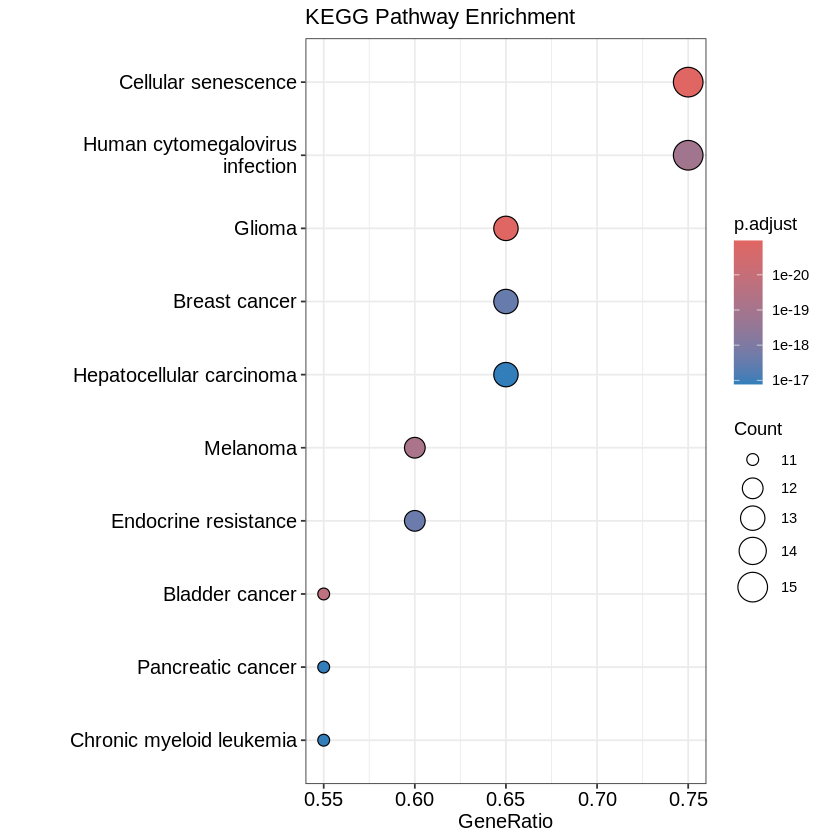

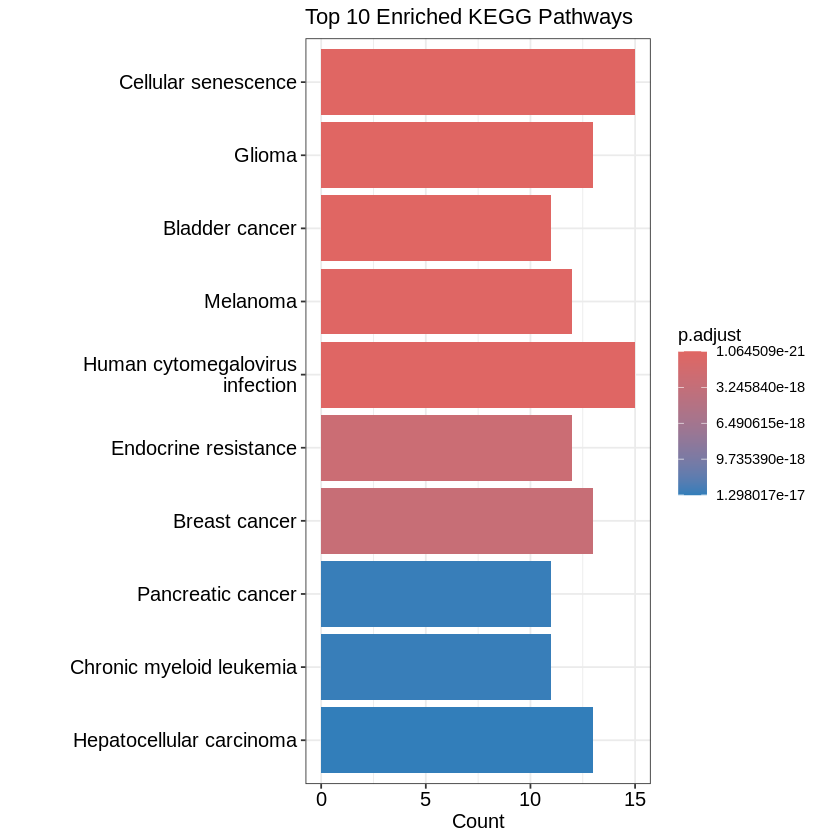

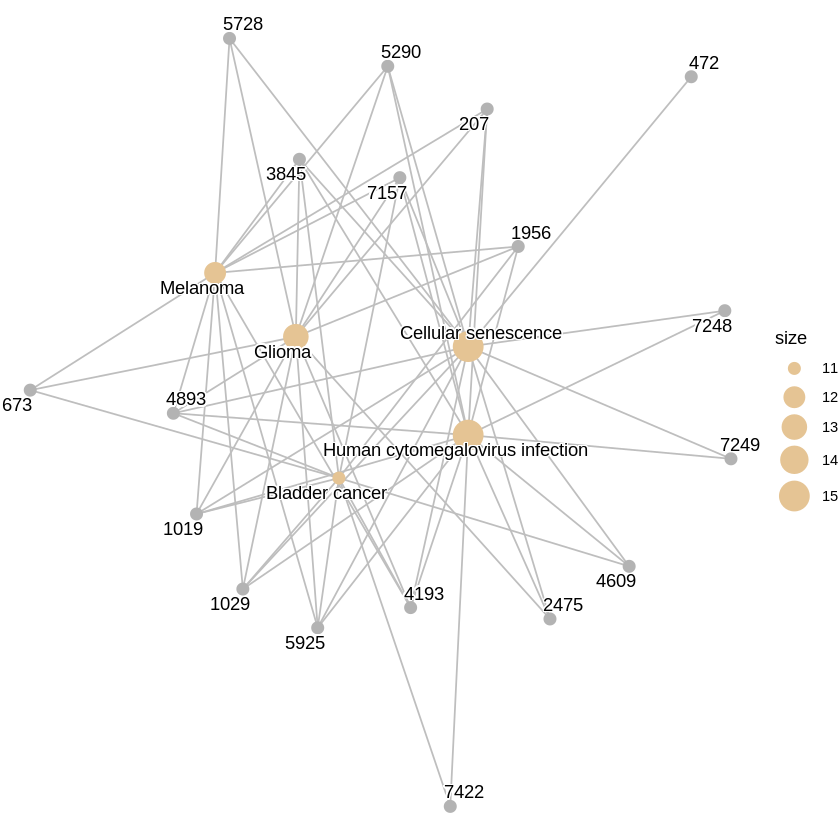

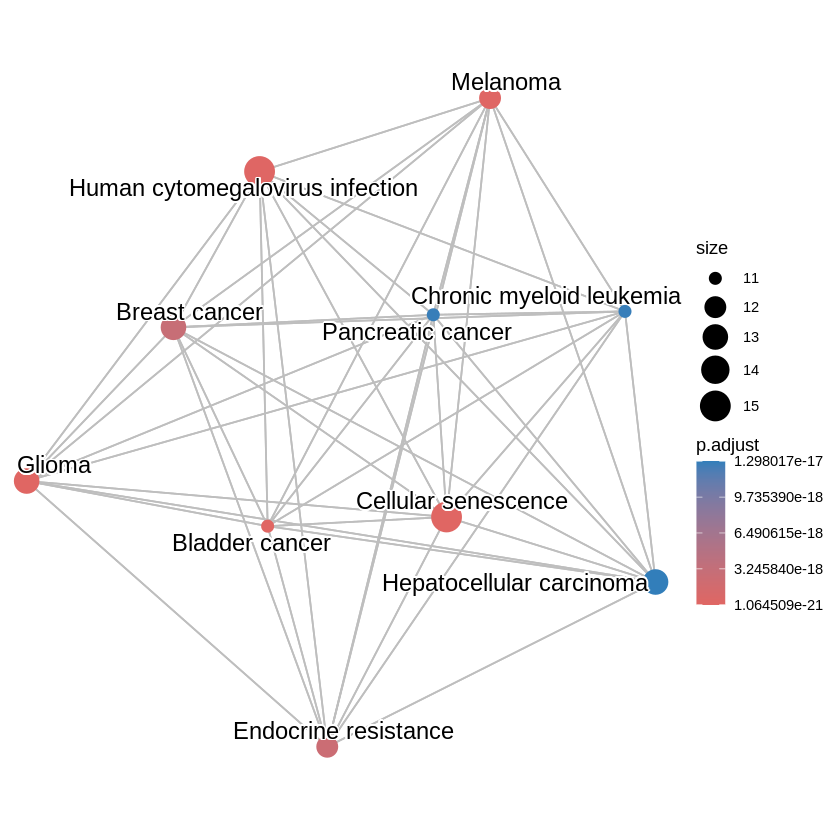

In [13]:
if (nrow(kegg_results) > 0) {

  p1 <- dotplot(kegg_enrich, showCategory=10, title="KEGG Pathway Enrichment")
  print(p1)

  p2 <- barplot(kegg_enrich, showCategory=10, title="Top 10 Enriched KEGG Pathways")
  print(p2)

  if (nrow(kegg_results) >= 2) {
    p3 <- cnetplot(kegg_enrich, showCategory=5)
    print(p3)
  }

  if (nrow(kegg_results) >= 2) {
    kegg_enrich2 <- pairwise_termsim(kegg_enrich)
    p4 <- emapplot(kegg_enrich2, showCategory=10)
    print(p4)
  }

} else {
  print("No significant KEGG pathways found with current cutoffs")
}

In [14]:
gene_list <- rnorm(length(gene_entrez$ENTREZID), mean=0, sd=2)
names(gene_list) <- gene_entrez$ENTREZID
gene_list <- sort(gene_list, decreasing=TRUE)

In [15]:
#Ranked gene list (top 10):
print(head(gene_list, 10))

      672      7248      5290      4609      7157      7422      7249       472 
4.1001694 2.1936780 2.0511427 2.0114770 1.8445349 1.2887531 0.8703630 0.7705608 
     2475      1019 
0.6635639 0.3626070 


In [16]:
gsea_kegg <- gseKEGG(geneList = gene_list,
                     organism = 'hsa',
                     minGSSize = 10,
                     maxGSSize = 500,
                     pvalueCutoff = 0.05,
                     verbose = FALSE)

no term enriched under specific pvalueCutoff...



In [17]:
print(head(gsea_kegg))

[1] ID              Description     setSize         enrichmentScore
[5] NES             pvalue          p.adjust        qvalue         
<0 rows> (or 0-length row.names)


In [18]:
if (nrow(as.data.frame(gsea_kegg)) > 0) {
  p5 <- ridgeplot(gsea_kegg, showCategory=10)
  print(p5)

  p6 <- gseaplot2(gsea_kegg, geneSetID=1:3, pvalue_table=TRUE)
  print(p6)
}

In [19]:
if (nrow(kegg_results) > 0) {
  write.csv(kegg_results, "KEGG_enrichment_results.csv", row.names=FALSE)
}